# Prediction of Economic Losses based on Food Waste

Dataset: https://www.kaggle.com/datasets/atharvasoundankar/global-food-wastage-dataset-2018-2024/data

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import missingno as msno
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv(r'C:\Users\Sabrina\OneDrive\Desktop\David_work\Python\global_food_wastage_dataset.csv')
df.head()

,Country,Year,Food Category,Total Waste (Tons),Economic Loss (Million $),Avg Waste per Capita (Kg),Population (Million),Household Waste (%)
0,Australia,2019,Fruits & Vegetables,19268.63,18686.68,72.69,87.59,53.64
1,Indonesia,2019,Prepared Food,3916.97,4394.48,192.52,1153.99,30.61
2,Germany,2022,Dairy Products,9700.16,8909.16,166.94,1006.11,48.08
3,France,2023,Fruits & Vegetables,46299.69,40551.22,120.19,953.05,31.91
4,France,2023,Beverages,33096.57,36980.82,104.74,1105.47,36.06


In [9]:
df.rename(columns={
    'Food Category':'food',
    'Avg Waste per Capita (Kg)':'food_waste_capita',
    'Economic Loss (Million $)':'economic_loss',
    'Population (Million)':'population_size',
    'Household Waste (%)':'household_waste',
    'Total Waste (Tons)':'total_waste'
}, inplace=True)
df.head()


,Country,Year,food,total_waste,economic_loss,food_waste_capita,population_size,household_waste
0,Australia,2019,Fruits & Vegetables,19268.63,18686.68,72.69,87.59,53.64
1,Indonesia,2019,Prepared Food,3916.97,4394.48,192.52,1153.99,30.61
2,Germany,2022,Dairy Products,9700.16,8909.16,166.94,1006.11,48.08
3,France,2023,Fruits & Vegetables,46299.69,40551.22,120.19,953.05,31.91
4,France,2023,Beverages,33096.57,36980.82,104.74,1105.47,36.06


In [11]:
df.isnull().sum()

Country              0
Year                 0
food                 0
total_waste          0
economic_loss        0
food_waste_capita    0
population_size      0
household_waste      0
dtype: int64

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Country            5000 non-null   object 
 1   Year               5000 non-null   int64  
 2   food               5000 non-null   object 
 3   total_waste        5000 non-null   float64
 4   economic_loss      5000 non-null   float64
 5   food_waste_capita  5000 non-null   float64
 6   population_size    5000 non-null   float64
 7   household_waste    5000 non-null   float64
dtypes: float64(5), int64(1), object(2)
memory usage: 312.6+ KB


In [15]:
df.drop_duplicates()

,Country,Year,food,total_waste,economic_loss,food_waste_capita,population_size,household_waste
0,Australia,2019,Fruits & Vegetables,19268.63,18686.68,72.69,87.59,53.64
1,Indonesia,2019,Prepared Food,3916.97,4394.48,192.52,1153.99,30.61
2,Germany,2022,Dairy Products,9700.16,8909.16,166.94,1006.11,48.08
3,France,2023,Fruits & Vegetables,46299.69,40551.22,120.19,953.05,31.91
4,France,2023,Beverages,33096.57,36980.82,104.74,1105.47,36.06
...,...,...,...,...,...,...,...,...
4995,France,2021,Beverages,47524.74,48058.40,77.41,1087.46,39.73
4996,Australia,2021,Beverages,32337.72,32705.08,194.35,1336.32,64.83
4997,China,2018,Meat & Seafood,20640.96,22485.33,21.04,16.13,31.23
4998,Australia,2021,Beverages,26566.64,29357.57,197.14,1086.17,69.95


In [17]:
df.describe()

,Year,total_waste,economic_loss,food_waste_capita,population_size,household_waste
count,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2021.015600,25061.780072,25039.703870,109.46397,706.606416,50.060890
std,1.999239,14245.119588,14620.236429,51.93373,402.546464,11.596203
min,2018.000000,502.610000,406.690000,20.09000,11.290000,30.020000
25%,2019.000000,12783.737500,12612.477500,64.05000,350.602500,40.012500
50%,2021.000000,24865.220000,24428.155000,110.08000,713.530000,50.295000
75%,2023.000000,37471.035000,37146.037500,154.52500,1057.255000,60.125000
max,2024.000000,49990.760000,59228.930000,199.97000,1399.970000,70.000000


In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

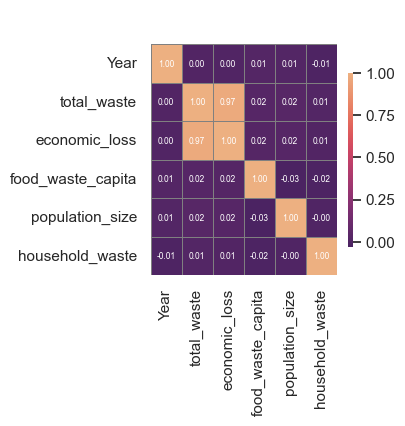

In [72]:
sns.set_theme(style="dark")
plt.figure(figsize=(3, 3))
ax = sns.heatmap(
    df.select_dtypes(include=['number']).corr(),
    annot=True,
    cmap="flare_r",
    fmt=".2f",
    linewidths=0.5,
    linecolor="gray",
    annot_kws={"size": 6, "color": "white"},
    cbar_kws={"shrink": 0.75, "aspect": 40},
)
plt.title("Correlation Matrix", fontsize=14, color="white", fontweight="bold", pad=15)
plt.show()

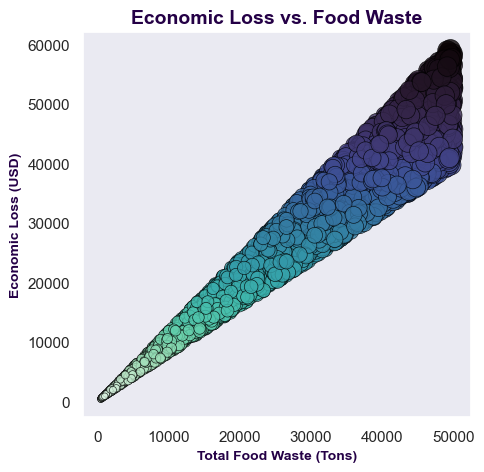

In [76]:
sns.set_style("dark")
plt.figure(figsize=(5, 5))
scatter = sns.scatterplot(
    data=df, 
    x='total_waste', 
    y='economic_loss', 
    hue='economic_loss',
    size='total_waste',
    sizes=(20, 200),
    palette='mako_r',
    alpha=0.8,
    edgecolor='black',
    legend = False
)

# Add title and labels
plt.title('Economic Loss vs. Food Waste', {'font':'Arial', 'size':'14','color': '#240046','weight':'bold'})
plt.xlabel('Total Food Waste (Tons)',{'font':'Arial', 'size':'10','color': '#240046','weight':'bold'})
plt.ylabel('Economic Loss (USD)', {'font':'Arial', 'size':'10','color': '#240046','weight':'bold'})

# Show plot
plt.show()

In [79]:
import plotly.express as px

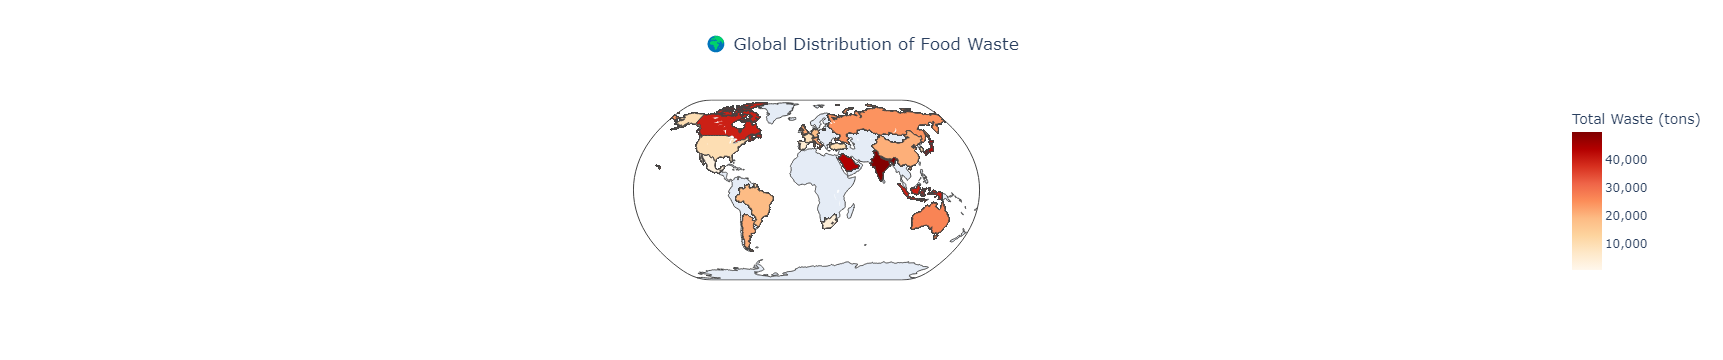

In [87]:
df.rename(columns={"Country": "country", "Total Waste": "total_waste"}, inplace=True)
fig = px.choropleth(
    df,
    locations="country",
    locationmode="country names",
    color="total_waste",
    hover_name="country",
    hover_data={"total_waste": ":,.0f"},  # Format numbers with commas
    color_continuous_scale=px.colors.sequential.OrRd,  # Warm color palette
    range_color=[df["total_waste"].min(), df["total_waste"].max()],  # Set range for better contrast
    title="🌍 Global Distribution of Food Waste",
)
fig.update_layout(
    title_x=0.5,  # Center align title
    geo=dict(showcoastlines=True, projection_type="natural earth"),  # Add coastlines for context
    coloraxis_colorbar=dict(
        title="Total Waste (tons)",  # Label colorbar
        tickformat=",",  # Comma formatting for large numbers
    ),
)
# Show the plot
fig.show()

In [89]:
X = df[['total_waste']]
y = df['economic_loss']


In [91]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [93]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [101]:
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error

y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Calculate error metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R² Score: {r2:.4f}")


Mean Absolute Error (MAE): 2510.63
Mean Squared Error (MSE): 11121978.76
Root Mean Squared Error (RMSE): 3334.96
R² Score: 0.9511


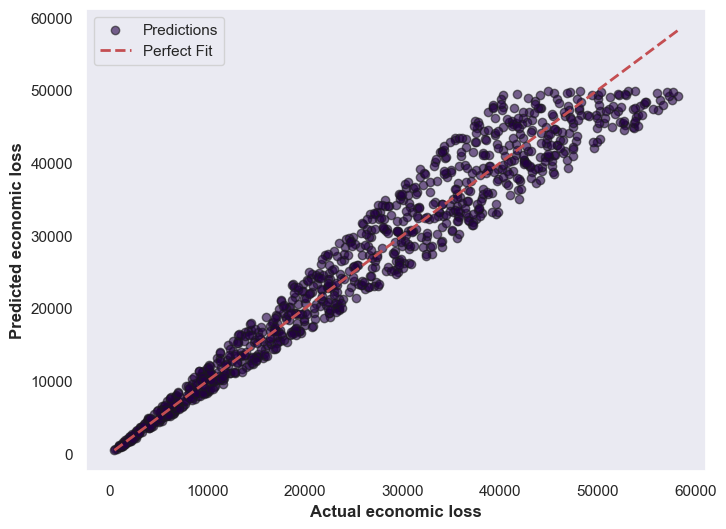

In [112]:
sns.set_style("dark")
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color="#240046", alpha=0.6, edgecolors="k", label="Predictions")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], "r--", lw=2, label="Perfect Fit")
plt.xlabel("Actual economic loss", fontsize=12, fontweight="bold")
plt.ylabel("Predicted economic loss", fontsize=12, fontweight="bold")
plt.legend()
plt.show()